In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
df_train = pd.read_csv('rec_data_final_train.csv')
df_test = pd.read_csv('rec_data_final_test.csv')
lag2_df_train = pd.read_csv('rec_data_lag_2_train.csv')
lag2_df_test = pd.read_csv('rec_data_lag_2_test.csv')
lag4_df_train = pd.read_csv('rec_data_lag_4_train.csv')
lag4_df_test = pd.read_csv('rec_data_lag_4_test.csv')
lag10_df_train = pd.read_csv('rec_data_lag_10_train.csv')
lag10_df_test = pd.read_csv('rec_data_lag_10_test.csv')
lag12_df_train = pd.read_csv('rec_data_lag_12_train.csv')
lag12_df_test = pd.read_csv('rec_data_lag_12_test.csv')

In [43]:
df_train = df_train.dropna()
df_test = df_test.dropna()
lag2_df_train = lag2_df_train.dropna()
lag2_df_test = lag2_df_test.dropna()
lag4_df_train = lag4_df_train.dropna()
lag4_df_test = lag4_df_test.dropna()
lag10_df_train = lag10_df_train.dropna()
lag10_df_test = lag10_df_test.dropna()
lag12_df_train = lag12_df_train.dropna()
lag12_df_test = lag12_df_test.dropna()

In [44]:
df_train.columns

Index(['DATE', 'PAYEMS', 'FEDFUNDS', '3MTB_SECONDARYMKT', 'GS1', 'GS5', 'GS10',
       'CPI', 'DEBT_PUB', 'SP500', 'INDPRO', 'TCU', 'UNRATE', 'Is_Recession',
       '10Y3MTH_SPREAD', 'FEDFUNDS_ROLMEAN3', 'INDPRO_ROLMEAN3',
       'UNRATE_ROLMEAN3', 'PAYEMS_3MTHCHANGE', '10Y3MTH_SPREAD_3MTHCHANGE',
       'INDPRO_3MTHCHANGE'],
      dtype='object')

In [45]:
#Target Variable
y_train = df_train['Is_Recession']
y_test = df_test['Is_Recession']
y_lag2_train = lag2_df_train['Is_Recession']
y_lag2_test = lag2_df_test['Is_Recession']
y_lag4_train = lag4_df_train['Is_Recession']
y_lag4_test = lag4_df_test['Is_Recession']
y_lag10_train = lag10_df_train['Is_Recession']
y_lag10_test = lag10_df_test['Is_Recession']
y_lag12_train = lag12_df_train['Is_Recession']
y_lag12_test = lag12_df_test['Is_Recession']

In [46]:
#Predictor Variables
X_train = df_train.drop(['Is_Recession', 'DATE'], axis = 1)
X_test = df_test.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag2_train = lag2_df_train.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag2_test = lag2_df_test.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag4_train = lag4_df_train.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag4_test = lag4_df_test.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag10_train = lag10_df_train.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag10_test = lag10_df_test.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag12_train = lag12_df_train.drop(['Is_Recession', 'DATE'], axis = 1)
X_lag12_test = lag12_df_test.drop(['Is_Recession', 'DATE'], axis = 1)

In [47]:
X_train = X_train.dropna()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 3 to 407
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PAYEMS                     405 non-null    int64  
 1   FEDFUNDS                   405 non-null    float64
 2   3MTB_SECONDARYMKT          405 non-null    float64
 3   GS1                        405 non-null    float64
 4   GS5                        405 non-null    float64
 5   GS10                       405 non-null    float64
 6   CPI                        405 non-null    float64
 7   DEBT_PUB                   405 non-null    float64
 8   SP500                      405 non-null    float64
 9   INDPRO                     405 non-null    float64
 10  TCU                        405 non-null    float64
 11  UNRATE                     405 non-null    float64
 12  10Y3MTH_SPREAD             405 non-null    float64
 13  FEDFUNDS_ROLMEAN3          405 non-null    float64

## Random Forest Model Builder

## No Lag Model

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 800, criterion = 'gini', random_state = 1, bootstrap = True, max_depth = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=800, random_state=1)

In [105]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
weights = np.linespace(0.0, 0.99, 200)

weights_grid = {'class_weight' :}

In [132]:
y_pred = rf.predict(X_test)
y_pred_proba = (rf.predict_proba(X_test)[:,1] >= 0.5).astype(bool)

cm = confusion_matrix(y_test, y_pred_proba)
accuracy_rate = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
cm, accuracy_rate

(array([[213,   0],
        [ 29,   0]]),
 0.8801652892561983)

Results inidcate that the Random Forest Classifier is classifying all periods as non-recession.

In [68]:
## Checking for Feature Importances
rf.feature_importances_

array([0.0269004 , 0.05032341, 0.04409893, 0.03468027, 0.02860175,
       0.03287391, 0.03409163, 0.07493465, 0.005573  , 0.03742193,
       0.02252567, 0.01732179, 0.031038  , 0.07705398, 0.03542318,
       0.01779356, 0.22937873, 0.02082703, 0.17913818])

(<AxesSubplot:>,
 SP500                        0.005573
 UNRATE                       0.017322
 UNRATE_ROLMEAN3              0.017794
 10Y3MTH_SPREAD_3MTHCHANGE    0.020827
 TCU                          0.022526
 PAYEMS                       0.026900
 GS5                          0.028602
 10Y3MTH_SPREAD               0.031038
 GS10                         0.032874
 CPI                          0.034092
 GS1                          0.034680
 INDPRO_ROLMEAN3              0.035423
 INDPRO                       0.037422
 3MTB_SECONDARYMKT            0.044099
 FEDFUNDS                     0.050323
 DEBT_PUB                     0.074935
 FEDFUNDS_ROLMEAN3            0.077054
 INDPRO_3MTHCHANGE            0.179138
 PAYEMS_3MTHCHANGE            0.229379
 dtype: float64)

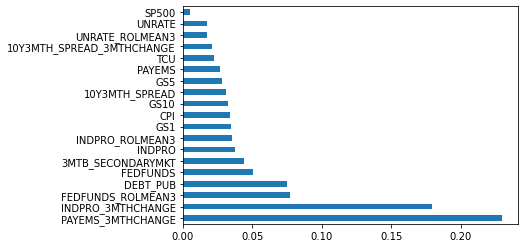

In [71]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh'), feat_importances.nsmallest(20)

In [102]:
## Feature Selection
cols = list(X_train.columns)
removed_feat = []
acc_rate = []

while (len(cols) > 0):
    ## Backward Feature Elimination
    ## DataFrame Modification
    feat_score = []
    X_train_temp = X_train[cols]
    X_test_temp = X_test[cols]
    
    ## Model Building and Performance Metric
    rf_temp = rf.fit(X_train_temp, y_train)
    y_pred_temp = rf_temp.predict(X_test_temp)
    cm_temp = confusion_matrix(y_test, y_pred_temp)
    acc_rate.append((cm_temp[0,0] + cm_temp[1,1]) / (cm_temp[0,0] + cm_temp[0,1] + cm_temp[1,0] + cm_temp[1,1]))
    
    
    feat_score = pd.Series(rf.feature_importances_, index = cols)
    min_score = min(feat_score)
    feat_with_min_score = feat_score.idxmin()
    removed_feat.append(feat_with_min_score)
    cols.remove(feat_with_min_score)
    

print(removed_feat)
print(acc_rate)

['SP500', 'UNRATE', 'TCU', 'UNRATE_ROLMEAN3', '10Y3MTH_SPREAD_3MTHCHANGE', 'PAYEMS', 'GS5', '10Y3MTH_SPREAD', 'GS1', 'GS10', 'INDPRO_ROLMEAN3', 'CPI', '3MTB_SECONDARYMKT', 'INDPRO', 'FEDFUNDS', 'DEBT_PUB', 'FEDFUNDS_ROLMEAN3', 'INDPRO_3MTHCHANGE', 'PAYEMS_3MTHCHANGE']
[0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.8801652892561983, 0.9256198347107438, 0.7892561983471075]


## With 

In [ ]:
## Feature Selection
cols = list(X_train.columns)
removed_feat = []
acc_rate = []

while (len(cols) > 0):
    ## Backward Feature Elimination
    ## DataFrame Modification
    feat_score = []
    X_train_temp = X_train[cols]
    X_test_temp = X_test[cols]
    
    ## Model Building and Performance Metric
    rf_temp = rf.fit(X_train_temp, y_train)
    y_pred_temp = rf_temp.predict(X_test_temp)
    cm_temp = confusion_matrix(y_test, y_pred_temp)
    acc_rate.append((cm_temp[0,0] + cm_temp[1,1]) / (cm_temp[0,0] + cm_temp[0,1] + cm_temp[1,0] + cm_temp[1,1]))
    
    
    feat_score = pd.Series(rf.feature_importances_, index = cols)
    min_score = min(feat_score)
    feat_with_min_score = feat_score.idxmin()
    removed_feat.append(feat_with_min_score)
    cols.remove(feat_with_min_score)
    
     

print(removed_feat)
print(acc_rate)

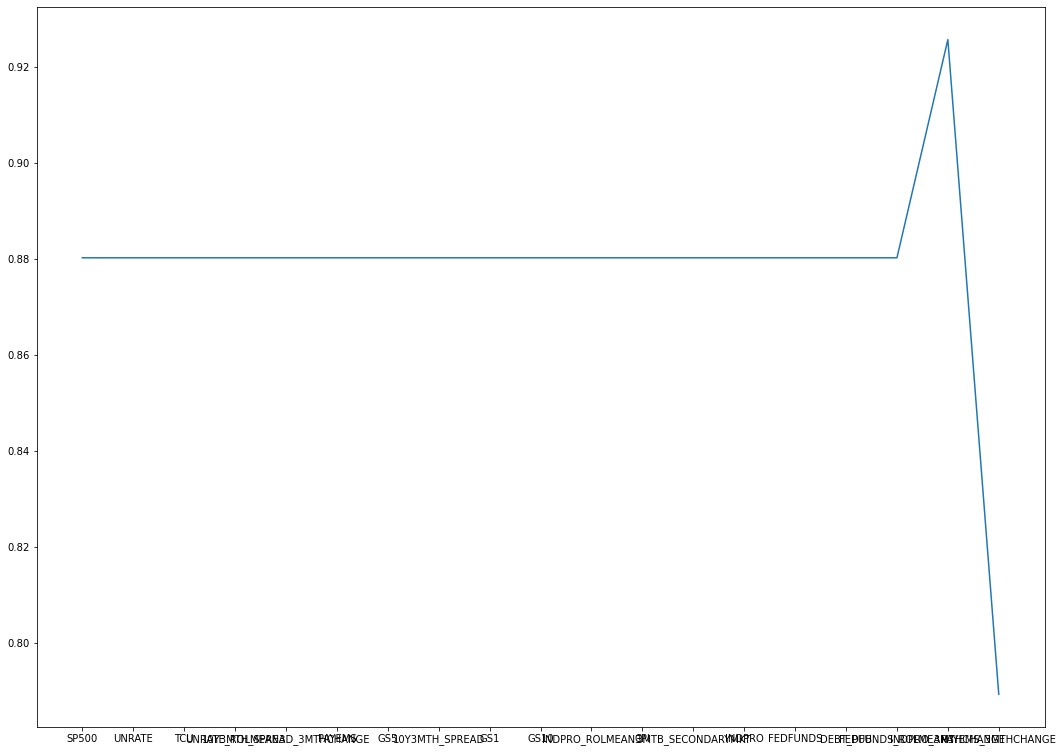

In [141]:
## Plot
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
plt.plot(removed_feat, acc_rate)

In [ ]:
from sklearn.model_selection import GridSearchCV


grid_param = {
    'n_estimators' : [100, 250, 500, 750, 1000, 1250],
    'criterion' : ['gini', 'entropy'],
    'bootstrap' : [True, False],
    'max_depth' : [10, 25, 50, 75, 100]
}

grid_seach = GridSearchCV(estimator )